### Importing 

In [1]:
import matplotlib.pyplot as plt

In [2]:
import googlemaps
from datetime import datetime

gmaps = googlemaps.Client(key= # Google Maps API Key here)


In [3]:
import pandas as pd
import csv
import os
import numpy as np

# Get the current working directory
cwd = os.getcwd()

Current working directory: /Users/annaglowski


-------------------------------------------------------------------------------------------------------------------

# Ride Data Functions

### Average Hourly Wait Time (per month)

In [4]:
# calculate the average wait time across the hour (take the data from 5 min increments to one hour increments)

# returns a vector of 12 months each with 24 hours of data

def hourly_average_wt(df):
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    df['hour'] = df['Date/Time'].dt.hour
    
    # average wait time by hour (1x24)
    hourly_wt_av = []
    
    for t in range(0, 24):
        temp = 0
        j = 0
        for hour, wait in zip(df['hour'], df['Wait Time']):
            if hour == t: 
                j = j + 1
                temp = temp + wait
        if j == 0:
            hourly_wt_av.append(0)
        else:
            hourly_wt_av.append(temp/j)
        
    return hourly_wt_av
        

### Average Hourly Wait Time (for full year)

In [5]:
# calculate the average hourly wait time over all months of the year for each ride

# send in the monthly hourly wait time average array, the months array of data and the number 
# of months that have data
#returns one vector of 24 hours (representing the ride itself over the full year)
def hourly_av_wt_ride(hourly_wt_av, num_months):
    
    ride_hourly_wt_av = np.ones(24)

    for month in range(0, num_months):
        temp = 0
        for t in range(0, 24):
            temp = ride_hourly_wt_av[t] + hourly_wt_av[month][t]
            ride_hourly_wt_av[t] = temp

            
    ride_hourly_wt_av = ride_hourly_wt_av/num_months
    
    return ride_hourly_wt_av
    

### Single Wait Time Average

In [6]:
def overall_wt_av_ride(ride_yr_hrly_wt_av):
    temp = 0
    for i in range(7,24):
        temp = temp + ride_yr_hrly_wt_av[i]

    return temp/16
    

-------------------------------------------------------------------------------------------------------------------

# Ride Data Input:

In [7]:
hrly_wt_data = pd.DataFrame()
overall_wt_data = []
ride_time = []

### Entrance

In [47]:
entrance = gmaps.find_place('Disneyland Railroad - Main Street Entrance California', 'textquery', fields = ['formatted_address', 'geometry','place_id'])

entrance_yr_hrly_wt_av = np.zeros(24)

hrly_wt_data['Entrance'] = entrance_yr_hrly_wt_av

overall_wt_data.append(0)

ride_time.append(0)

### Small World

In [48]:

# load data
months = ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'jul', 'aug', 'sep', 'oct', 
          #'nov', 
          #'dec'
         ]

num_months = 10 

hourly_wt_av = []

for month in months:
    df = pd.read_csv(r'/Users/annaglowski/Desktop/Thesis/Small_World/Small_World_%s.csv' % month.title())
    hourly_wt_av.append(hourly_average_wt(df))

# Average wait times by hour for one year
small_world_yr_hrly_wt_av = hourly_av_wt_ride(hourly_wt_av, num_months) 

# Add to df
hrly_wt_data['Its a Small World'] = small_world_yr_hrly_wt_av

# Average wait time overall (single number)
small_world_overall_wt_av = overall_wt_av_ride(small_world_yr_hrly_wt_av)

# Add to df
overall_wt_data.append(small_world_overall_wt_av)

# ride time
ride_time.append(14)

# Get coordinates
small_world = gmaps.find_place('Its a small world', 'textquery', fields = ['formatted_address', 'geometry','place_id'])

### Space Mountain

In [49]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

num_months = 12

hourly_wt_av = []

for month in months:
    df = pd.read_csv(r'/Users/annaglowski/Desktop/Thesis/Space_Mt/Space_Mt_%s.csv' % month.title())
    hourly_wt_av.append(hourly_average_wt(df))
    
# hourly wait time data 
space_mt_yr_hrly_wt_av = hourly_av_wt_ride(hourly_wt_av, num_months)    

# Add to df
hrly_wt_data['Space Mountain'] = space_mt_yr_hrly_wt_av

# Overall average wait time (Single number)
space_mt_overall_wt_av = overall_wt_av_ride(space_mt_yr_hrly_wt_av)

# Add to df
overall_wt_data.append(space_mt_overall_wt_av)

# ride time
ride_time.append(5)

# Get coordinates
space_mt = gmaps.find_place('Space Mountain (Disneyland)', 'textquery', fields = ['formatted_address', 'geometry','place_id'])

### Star Wars: Rise of Resistance

In [50]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

num_months = 12

hourly_wt_av = []

for month in months:
    df = pd.read_csv(r'/Users/annaglowski/Desktop/Thesis/Star_Wars/Star_Wars_%s.csv' % month.title())
    hourly_wt_av.append(hourly_average_wt(df))

# hourly wait time average
star_wars_yr_hrly_wt_av = hourly_av_wt_ride(hourly_wt_av, num_months)  

# Add to df
hrly_wt_data['Star Wars: Rise of Resistance'] = star_wars_yr_hrly_wt_av

# Overall average wait time (single number)
star_wars_overall_wt_av = overall_wt_av_ride(star_wars_yr_hrly_wt_av)

# Add to df
overall_wt_data.append(star_wars_overall_wt_av)

# ride time
ride_time.append(18)

# Get coordinates
star_wars = gmaps.find_place('Star Wars: Rise of Resistance', 'textquery', fields = ['formatted_address', 'geometry','place_id'])

### Indianna Jones Adventure

In [51]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

num_months = 12

hourly_wt_av = []

for month in months:
    df = pd.read_csv(r'/Users/annaglowski/Desktop/Thesis/Indy_Jones/Indy_Jones_%s.csv' % month.title())
    hourly_wt_av.append(hourly_average_wt(df))

# Hourly average wait time
indy_jones_yr_hrly_wt_av = hourly_av_wt_ride(hourly_wt_av, num_months)  

# Add to df
hrly_wt_data['Indiana Jones Adventure'] = indy_jones_yr_hrly_wt_av

# Overall average wait time (single number)
indy_jones_overall_wt_av = overall_wt_av_ride(indy_jones_yr_hrly_wt_av)

# Add to df
overall_wt_data.append(indy_jones_overall_wt_av)


# ride time
ride_time.append(10)

# Get coordinates
indy_jones = gmaps.find_place('Indiana Jones Adventure', 'textquery', fields = ['formatted_address', 'geometry','place_id'])


### Pirates of the Caribbean 

In [52]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

num_months = 12

hourly_wt_av = []

for month in months:
    df = pd.read_csv(r'/Users/annaglowski/Desktop/Thesis/Pirates/Pirates_%s.csv' % month.title())
    hourly_wt_av.append(hourly_average_wt(df))

# Hourly average wait time
pirates_yr_hrly_wt_av = hourly_av_wt_ride(hourly_wt_av, num_months)  

# Add to df
hrly_wt_data['Pirates of the Caribbean'] = pirates_yr_hrly_wt_av

# Overall average wait time
pirates_overall_wt_av = overall_wt_av_ride(pirates_yr_hrly_wt_av)

# Add to df
overall_wt_data.append(pirates_overall_wt_av)

# ride time
ride_time.append(10)

# Get coordinates
pirates = gmaps.find_place('Pirates of the Caribbean (Disneyland)', 'textquery', fields = ['formatted_address', 'geometry','place_id'])


### Splash Mountain

In [53]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

num_months = 12

hourly_wt_av = []

for month in months:
    df = pd.read_csv(r'/Users/annaglowski/Desktop/Thesis/Splash_Mt/Splash_Mt_%s.csv' % month.title())
    hourly_wt_av.append(hourly_average_wt(df))

# Hourly average wait time
splash_mt_yr_hrly_wt_av = hourly_av_wt_ride(hourly_wt_av, num_months)  

# Add to df
hrly_wt_data['Splash Mountain'] = splash_mt_yr_hrly_wt_av

# Overall average wait time (single number)
splash_mt_overall_wt_av = overall_wt_av_ride(splash_mt_yr_hrly_wt_av)

# Add to df
overall_wt_data.append(splash_mt_overall_wt_av)

# ride time
ride_time.append(11)

# Get coordinates
splash_mt = gmaps.find_place('Splash Mountain (Disneyland)', 'textquery', fields = ['formatted_address', 'geometry','place_id'])


### Big Thunder Mountain Railroad

In [15]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

num_months = 12

hourly_wt_av = []

for month in months:
    df = pd.read_csv(r'/Users/annaglowski/Desktop/Thesis/Big_Thunder/Big_Thunder_%s.csv' % month.title())
    hourly_wt_av.append(hourly_average_wt(df))

# Hourly average wait time
big_thunder_yr_hrly_wt_av = hourly_av_wt_ride(hourly_wt_av, num_months)  

# Add to tdf
hrly_wt_data['Big Thunder Mountain Railroad'] = big_thunder_yr_hrly_wt_av

# Overall average wait time (single number)
big_thunder_overall_wt_av = overall_wt_av_ride(big_thunder_yr_hrly_wt_av)

# Add to df
overall_wt_data.append(big_thunder_overall_wt_av)

# ride time
ride_time.append(3.5)

# Get Coordinates
big_thunder = gmaps.find_place('Big Thunder Mountain Railroad (California)', 'textquery', fields = ['formatted_address', 'geometry','place_id'])


### Matterhorn Bobsleds

In [54]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

num_months = 12

hourly_wt_av = []

for month in months:
    df = pd.read_csv(r'/Users/annaglowski/Desktop/Thesis/Matterhorn/Matterhorn_%s.csv' % month.title())
    hourly_wt_av.append(hourly_average_wt(df))

# Hourly average wait time
matterhorn_yr_hrly_wt_av = hourly_av_wt_ride(hourly_wt_av, num_months)  

# add to df
hrly_wt_data['Matterhorn Bobsleds'] = matterhorn_yr_hrly_wt_av

# Overall average wait time (single number)
matterhorn_overall_wt_av = overall_wt_av_ride(matterhorn_yr_hrly_wt_av)

# Add to df
overall_wt_data.append(matterhorn_overall_wt_av)

# ride time
ride_time.append(4)

# Get coordinates
matterhorn = gmaps.find_place('Matterhorn Bobsleds', 'textquery', fields = ['formatted_address', 'geometry','place_id'])

### Location of Restaurant Options

In [57]:
plaza_inn = gmaps.find_place('Plaza Inn Disneyland', 'textquery', fields = ['formatted_address', 'geometry','place_id'])

galactic_grill = gmaps.find_place('Galactic Grill Disneyland', 'textquery', fields = ['formatted_address', 'geometry','place_id'])

daisy_dinner = gmaps.find_place("Daisy's Dinner Disneyland", 'textquery', fields = ['formatted_address', 'geometry','place_id'])

blue_bayou = gmaps.find_place('Blue Bayou Restaurant Disneyland', 'textquery', fields = ['formatted_address', 'geometry','place_id'])

golden = gmaps.find_place('The Golden Horseshoe Disneyland', 'textquery', fields = ['formatted_address', 'geometry','place_id'])

bengal_bbq = gmaps.find_place('Bengal Barbeque Disneyland', 'textquery', fields = ['formatted_address', 'geometry','place_id'])

tavern = gmaps.find_place('Red Rose Tavern Disneyland', 'textquery', fields = ['formatted_address', 'geometry','place_id'])

troubadour = gmaps.find_place('Troubadour Tavern Disneyland', 'textquery', fields = ['formatted_address', 'geometry','place_id'])


-------------------------------------------------------------------------------------------------------------------

## Introduction Graph - Average Wait time by Hour

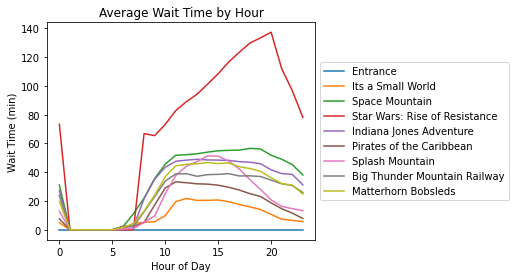

In [60]:
hour = [0, 1, 2, 3,4 ,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]


rides = ['Entrance', 'Its a Small World', 'Space Mountain', 'Star Wars: Rise of Resistance', 'Indiana Jones Adventure', 
         'Pirates of the Caribbean', 'Splash Mountain', 'Big Thunder Mountain Railway', 'Matterhorn Bobsleds']

fig = plt.figure()
ax = plt.subplot(111)

ax.plot(hour, hrly_wt_data)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(rides, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Average Wait Time by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Wait Time (min)')

plt.savefig("wt_data.pdf", format="pdf", bbox_inches="tight")
plt.show()

-------------------------------------------------------------------------------------------------------------------

# Distance Matrix - Initial and Time Formulation

### Creating a Dataframe of all Rides with Lat and Long

In [61]:

data = [['Entrance', entrance['candidates'][0]['geometry']['location']['lat'],entrance['candidates'][0]['geometry']['location']['lng']],
        ['Its a Small World', small_world['candidates'][0]['geometry']['location']['lat'],small_world['candidates'][0]['geometry']['location']['lng']],
        ['Space Mountain', space_mt['candidates'][0]['geometry']['location']['lat'], space_mt['candidates'][0]['geometry']['location']['lng']],
        ['Star Wars: Rise of Resistance', star_wars['candidates'][0]['geometry']['location']['lat'], star_wars['candidates'][0]['geometry']['location']['lng']],
        ['Indiana Jones Adventure', indy_jones['candidates'][0]['geometry']['location']['lat'], indy_jones['candidates'][0]['geometry']['location']['lng']],
        ['Pirates of the Caribbean', pirates['candidates'][0]['geometry']['location']['lat'], pirates['candidates'][0]['geometry']['location']['lng']],
        ['Splash Mountain', splash_mt['candidates'][0]['geometry']['location']['lat'], splash_mt['candidates'][0]['geometry']['location']['lng']],
        ['Big Thunder Mountain Railway', big_thunder['candidates'][0]['geometry']['location']['lat'], big_thunder['candidates'][0]['geometry']['location']['lng']],
        ['Matterhorn Bobsleds', matterhorn['candidates'][0]['geometry']['location']['lat'], matterhorn['candidates'][0]['geometry']['location']['lng']],
        ['Exit', entrance['candidates'][0]['geometry']['location']['lat'],entrance['candidates'][0]['geometry']['location']['lng']]]


df = pd.DataFrame(data, columns=['Ride', 'Latitude', 'Longitude'])

df.to_csv('Lat_Long.csv')


### Calculating the Distance Matrix

In [62]:
from itertools import tee

#empty list - will be used to store calculated distances
time_list = []
distance_list = []
origin_id_list = []
destination_id_list = []

# Loop through each row in the data frame using pairwise
for (i1, row1) in df.iterrows():
      #Assign latitude and longitude as origin/departure points
    lat_origin = row1['Latitude'] 
    long_origin = row1['Longitude']
    origin = (lat_origin,long_origin)
    origin_id = row1['Ride'] 
    
    for (i2, row2) in  df.iterrows():
        #Assign latitude and longitude from the next row as the destination point
        lat_dest = row2['Latitude']   # Save value as lat
        long_dest = row2['Longitude'] # Save value as lat
        destination = (lat_dest,long_dest)
        destination_id = row2['Ride']
        #pass origin and destination variables to distance_matrix function# output in meters
        result = result = gmaps.distance_matrix(origin, destination, mode = 'walking')

        result_distance = result["rows"][0]["elements"][0]["distance"]["text"]
        result_time = result["rows"][0]["elements"][0]["duration"]["text"]
          
        time_list.append(result_time)
        distance_list.append(result_distance)
        origin_id_list.append(origin_id)
        destination_id_list.append(destination_id)

distance_matrix = pd.DataFrame()

distance_matrix['Origin'] = origin_id_list
distance_matrix['Destination'] = destination_id_list
distance_matrix['Time'] = time_list
distance_matrix['Distance'] = distance_list

### Converting to distance and time integer

In [63]:
# Convert the walking time string to ints
import re

walk = [] #total wait time 
dist = []

for i in range(0,100):
    time = distance_matrix['Time'][i]
    distance = distance_matrix['Distance'][i]
    t = [float(s) for s in re.findall(r'-?\d+\.?\d*', time)]
    d = [float(b) for b in re.findall(r'-?\d+\.?\d*', distance)]
    walk.append(t[0])
    dist.append(d[0])
    

distance_matrix['Walk Time'] = walk
distance_matrix['Distance Walk'] = dist


distance_matrix.to_csv('distance_matrix.csv')

-------------------------------------------------------------------------------------------------------------------

# Distance Matrix - Dining Complication

### Creating a Dataframe of all Activities with Lat and Long

In [65]:
data_food = [['Entrance', entrance['candidates'][0]['geometry']['location']['lat'],entrance['candidates'][0]['geometry']['location']['lng']],
        ['Its a Small World', small_world['candidates'][0]['geometry']['location']['lat'],small_world['candidates'][0]['geometry']['location']['lng']],
        ['Space Mountain', space_mt['candidates'][0]['geometry']['location']['lat'], space_mt['candidates'][0]['geometry']['location']['lng']],
        ['Star Wars: Rise of Resistance', star_wars['candidates'][0]['geometry']['location']['lat'], star_wars['candidates'][0]['geometry']['location']['lng']],
        ['Indiana Jones Adventure', indy_jones['candidates'][0]['geometry']['location']['lat'], indy_jones['candidates'][0]['geometry']['location']['lng']],
        ['Pirates of the Caribbean', pirates['candidates'][0]['geometry']['location']['lat'], pirates['candidates'][0]['geometry']['location']['lng']],
        ['Splash Mountain', splash_mt['candidates'][0]['geometry']['location']['lat'], splash_mt['candidates'][0]['geometry']['location']['lng']],
        ['Big Thunder Mountain Railway', big_thunder['candidates'][0]['geometry']['location']['lat'], big_thunder['candidates'][0]['geometry']['location']['lng']],
        ['Matterhorn Bobsleds', matterhorn['candidates'][0]['geometry']['location']['lat'], matterhorn['candidates'][0]['geometry']['location']['lng']],
        ['Exit', entrance['candidates'][0]['geometry']['location']['lat'],entrance['candidates'][0]['geometry']['location']['lng']],
        ['Plaza Inn - L', plaza_inn['candidates'][0]['geometry']['location']['lat'],plaza_inn['candidates'][0]['geometry']['location']['lng']],
        ['Galactic Grill - L', galactic_grill['candidates'][0]['geometry']['location']['lat'],galactic_grill['candidates'][0]['geometry']['location']['lng']],
        ["Daisy's Dinner - L", daisy_dinner['candidates'][0]['geometry']['location']['lat'],daisy_dinner['candidates'][0]['geometry']['location']['lng']],
        ['Blue Bayou Restaurant - L', blue_bayou['candidates'][0]['geometry']['location']['lat'],blue_bayou['candidates'][0]['geometry']['location']['lng']],
        ['Bengal Barbeque - L', bengal_bbq['candidates'][0]['geometry']['location']['lat'],bengal_bbq['candidates'][0]['geometry']['location']['lng']],
        ['The Golden Horseshoe - L', golden['candidates'][0]['geometry']['location']['lat'],golden['candidates'][0]['geometry']['location']['lng']],
        ['Red Rose Tavern - L', tavern['candidates'][0]['geometry']['location']['lat'], tavern['candidates'][0]['geometry']['location']['lng']],
        ['Troubadour Tavern - L', troubadour['candidates'][0]['geometry']['location']['lat'],troubadour['candidates'][0]['geometry']['location']['lng']],
        ['Plaza Inn - D', plaza_inn['candidates'][0]['geometry']['location']['lat'],plaza_inn['candidates'][0]['geometry']['location']['lng']],
        ['Galactic Grill - D', galactic_grill['candidates'][0]['geometry']['location']['lat'],galactic_grill['candidates'][0]['geometry']['location']['lng']],
        ["Daisy's Dinner - D", daisy_dinner['candidates'][0]['geometry']['location']['lat'],daisy_dinner['candidates'][0]['geometry']['location']['lng']],
        ['Blue Bayou Restaurant - D', blue_bayou['candidates'][0]['geometry']['location']['lat'],blue_bayou['candidates'][0]['geometry']['location']['lng']],     
        ['Bengal Barbeque - D', bengal_bbq['candidates'][0]['geometry']['location']['lat'],bengal_bbq['candidates'][0]['geometry']['location']['lng']],     
        ['The Golden Horseshoe - D', golden['candidates'][0]['geometry']['location']['lat'],golden['candidates'][0]['geometry']['location']['lng']],     
        ['Red Rose Tavern - D', tavern['candidates'][0]['geometry']['location']['lat'], tavern['candidates'][0]['geometry']['location']['lng']],     
        ['Troubadour Tavern - D', troubadour['candidates'][0]['geometry']['location']['lat'],troubadour['candidates'][0]['geometry']['location']['lng']]] 
             
             
dffood = pd.DataFrame(data_food, columns=['Ride', 'Latitude', 'Longitude'])

# Save for future use
dffood.to_csv('Lat_Long_DFood.csv')

### Calculating the Dining Complication Distance Matrix 

In [24]:
# Calculations of Distance Matrix

from itertools import tee

#empty list - will be used to store calculated distances
time_list = []
distance_list = []
origin_id_list = []
destination_id_list = []

# Loop through each row in the data frame using pairwise
for (i1, row1) in dffood.iterrows():
      #Assign latitude and longitude as origin/departure points
    lat_origin = row1['Latitude'] 
    long_origin = row1['Longitude']
    origin = (lat_origin,long_origin)
    origin_id = row1['Ride'] 
    
    for (i2, row2) in  dffood.iterrows():
        #Assign latitude and longitude from the next row as the destination point
        lat_dest = row2['Latitude']   # Save value as lat
        long_dest = row2['Longitude'] # Save value as lat
        destination = (lat_dest,long_dest)
        destination_id = row2['Ride']
        #pass origin and destination variables to distance_matrix function# output in meters
        result = result = gmaps.distance_matrix(origin, destination, mode = 'walking')

        result_distance = result["rows"][0]["elements"][0]["distance"]["text"]
        result_time = result["rows"][0]["elements"][0]["duration"]["text"]
          
        time_list.append(result_time)
        distance_list.append(result_distance)
        origin_id_list.append(origin_id)
        destination_id_list.append(destination_id)

distance_matrix_Dfood = pd.DataFrame()

distance_matrix_Dfood['Origin'] = origin_id_list
distance_matrix_Dfood['Destination'] = destination_id_list
distance_matrix_Dfood['Time'] = time_list
distance_matrix_Dfood['Distance'] = distance_list

### Converting to distance and time integer

In [66]:
# Convert the walking time string to ints
import re

walk = [] #total wait time 
dist = []

for i in range(0,676):
    time = distance_matrix_Dfood['Time'][i]
    distance = distance_matrix_Dfood['Distance'][i]
    t = [float(s) for s in re.findall(r'-?\d+\.?\d*', time)]
    d = [float(b) for b in re.findall(r'-?\d+\.?\d*', distance)]
    walk.append(t[0])
    dist.append(d[0])
    

distance_matrix_Dfood['Walk Time'] = walk
distance_matrix_Dfood['Distance Walk'] = dist


distance_matrix_Dfood.to_csv('distance_matrix_Dfood.csv')

-------------------------------------------------------------------------------------------------------------------

## Distance Matrix - Prioritization and Downtime Complication

In [ ]:
# Location of the Fireworks
parade = gmaps.find_place('Sleeping Beauty Castle Disneyland California', 'textquery', fields = ['formatted_address', 'geometry','place_id'])

### Creating a Dataframe of all Activities with Lat and Long

In [ ]:
# Create Dataframe with Exit and FOOD

data_food = [['Entrance', entrance['candidates'][0]['geometry']['location']['lat'],entrance['candidates'][0]['geometry']['location']['lng']],
        ['Its a Small World 1', small_world['candidates'][0]['geometry']['location']['lat'],small_world['candidates'][0]['geometry']['location']['lng']],
        ['Its a Small World 2', small_world['candidates'][0]['geometry']['location']['lat'],small_world['candidates'][0]['geometry']['location']['lng']],
        ['Space Mountain 1', space_mt['candidates'][0]['geometry']['location']['lat'], space_mt['candidates'][0]['geometry']['location']['lng']],
        ['Space Mountain 2', space_mt['candidates'][0]['geometry']['location']['lat'], space_mt['candidates'][0]['geometry']['location']['lng']],
        ['Star Wars: Rise of Resistance 1', star_wars['candidates'][0]['geometry']['location']['lat'], star_wars['candidates'][0]['geometry']['location']['lng']],
        ['Star Wars: Rise of Resistance 2', star_wars['candidates'][0]['geometry']['location']['lat'], star_wars['candidates'][0]['geometry']['location']['lng']],
        ['Indiana Jones Adventure 1', indy_jones['candidates'][0]['geometry']['location']['lat'], indy_jones['candidates'][0]['geometry']['location']['lng']],
        ['Indiana Jones Adventure 2', indy_jones['candidates'][0]['geometry']['location']['lat'], indy_jones['candidates'][0]['geometry']['location']['lng']],
        ['Pirates of the Caribbean 1', pirates['candidates'][0]['geometry']['location']['lat'], pirates['candidates'][0]['geometry']['location']['lng']],
        ['Pirates of the Caribbean 2', pirates['candidates'][0]['geometry']['location']['lat'], pirates['candidates'][0]['geometry']['location']['lng']],   
        ['Splash Mountain 1', splash_mt['candidates'][0]['geometry']['location']['lat'], splash_mt['candidates'][0]['geometry']['location']['lng']],
        ['Splash Mountain 2', splash_mt['candidates'][0]['geometry']['location']['lat'], splash_mt['candidates'][0]['geometry']['location']['lng']],
        ['Big Thunder Mountain Railway 1', big_thunder['candidates'][0]['geometry']['location']['lat'], big_thunder['candidates'][0]['geometry']['location']['lng']],
        ['Big Thunder Mountain Railway 2', big_thunder['candidates'][0]['geometry']['location']['lat'], big_thunder['candidates'][0]['geometry']['location']['lng']],
        ['Matterhorn Bobsleds 1', matterhorn['candidates'][0]['geometry']['location']['lat'], matterhorn['candidates'][0]['geometry']['location']['lng']],
        ['Matterhorn Bobsleds 2', matterhorn['candidates'][0]['geometry']['location']['lat'], matterhorn['candidates'][0]['geometry']['location']['lng']],        
        ['Exit', entrance['candidates'][0]['geometry']['location']['lat'],entrance['candidates'][0]['geometry']['location']['lng']],
        ['Fireworks', parade['candidates'][0]['geometry']['location']['lat'],parade['candidates'][0]['geometry']['location']['lng']],
        ['Plaza Inn - L', plaza_inn['candidates'][0]['geometry']['location']['lat'],plaza_inn['candidates'][0]['geometry']['location']['lng']],
        ['Galactic Grill - L', galactic_grill['candidates'][0]['geometry']['location']['lat'],galactic_grill['candidates'][0]['geometry']['location']['lng']],
        ["Daisy's Dinner - L", daisy_dinner['candidates'][0]['geometry']['location']['lat'],daisy_dinner['candidates'][0]['geometry']['location']['lng']],
        ['Blue Bayou Restaurant - L', blue_bayou['candidates'][0]['geometry']['location']['lat'],blue_bayou['candidates'][0]['geometry']['location']['lng']],
        ['Bengal Barbeque - L', bengal_bbq['candidates'][0]['geometry']['location']['lat'],bengal_bbq['candidates'][0]['geometry']['location']['lng']],
        ['The Golden Horseshoe - L', golden['candidates'][0]['geometry']['location']['lat'],golden['candidates'][0]['geometry']['location']['lng']],
        ['Red Rose Tavern - L', tavern['candidates'][0]['geometry']['location']['lat'], tavern['candidates'][0]['geometry']['location']['lng']],
        ['Troubadour Tavern - L', troubadour['candidates'][0]['geometry']['location']['lat'],troubadour['candidates'][0]['geometry']['location']['lng']],
        ['Plaza Inn - D', plaza_inn['candidates'][0]['geometry']['location']['lat'],plaza_inn['candidates'][0]['geometry']['location']['lng']],
        ['Galactic Grill - D', galactic_grill['candidates'][0]['geometry']['location']['lat'],galactic_grill['candidates'][0]['geometry']['location']['lng']],
        ["Daisy's Dinner - D", daisy_dinner['candidates'][0]['geometry']['location']['lat'],daisy_dinner['candidates'][0]['geometry']['location']['lng']],
        ['Blue Bayou Restaurant - D', blue_bayou['candidates'][0]['geometry']['location']['lat'],blue_bayou['candidates'][0]['geometry']['location']['lng']],     
        ['Bengal Barbeque - D', bengal_bbq['candidates'][0]['geometry']['location']['lat'],bengal_bbq['candidates'][0]['geometry']['location']['lng']],     
        ['The Golden Horseshoe - D', golden['candidates'][0]['geometry']['location']['lat'],golden['candidates'][0]['geometry']['location']['lng']],     
        ['Red Rose Tavern - D', tavern['candidates'][0]['geometry']['location']['lat'], tavern['candidates'][0]['geometry']['location']['lng']],     
        ['Troubadour Tavern - D', troubadour['candidates'][0]['geometry']['location']['lat'],troubadour['candidates'][0]['geometry']['location']['lng']]] 
             
             
dftrides = pd.DataFrame(data_food, columns=['Ride', 'Latitude', 'Longitude'])

# Save for future use
dftrides.to_csv('Lat_Long_TRides.csv')

### Calculating the Prioritization and Downtime Complication Distance Matrix 

In [ ]:
from itertools import tee

#empty list - will be used to store calculated distances
time_list = []
distance_list = []
origin_id_list = []
destination_id_list = []

# Loop through each row in the data frame using pairwise
for (i1, row1) in dftrides.iterrows():
      #Assign latitude and longitude as origin/departure points
    lat_origin = row1['Latitude'] 
    long_origin = row1['Longitude']
    origin = (lat_origin,long_origin)
    origin_id = row1['Ride'] 
    
    for (i2, row2) in  dftrides.iterrows():
        #Assign latitude and longitude from the next row as the destination point
        lat_dest = row2['Latitude']   # Save value as lat
        long_dest = row2['Longitude'] # Save value as lat
        destination = (lat_dest,long_dest)
        destination_id = row2['Ride']
        #pass origin and destination variables to distance_matrix function# output in meters
        result = result = gmaps.distance_matrix(origin, destination, mode = 'walking')

        result_distance = result["rows"][0]["elements"][0]["distance"]["text"]
        result_time = result["rows"][0]["elements"][0]["duration"]["text"]
          
        time_list.append(result_time)
        distance_list.append(result_distance)
        origin_id_list.append(origin_id)
        destination_id_list.append(destination_id)

distance_matrix_trides = pd.DataFrame()

distance_matrix_trides['Origin'] = origin_id_list
distance_matrix_trides['Destination'] = destination_id_list
distance_matrix_trides['Time'] = time_list
distance_matrix_trides['Distance'] = distance_list


### Converting to distance and time integer

In [46]:
# Convert the walking time string to ints
import re

walk = [] #total wait time 
dist = []

for i in range(0,1225):
    time = distance_matrix_trides['Time'][i]
    distance = distance_matrix_trides['Distance'][i]
    t = [float(s) for s in re.findall(r'-?\d+\.?\d*', time)]
    d = [float(b) for b in re.findall(r'-?\d+\.?\d*', distance)]
    walk.append(t[0])
    dist.append(d[0])
    

distance_matrix_trides['Walk Time'] = walk
distance_matrix_trides['Distance Walk'] = dist


distance_matrix_trides.to_csv('distance_matrix_trides.csv')
